In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# imports
from itertools import combinations
from scipy.stats import geom,poisson,binom,gamma
from scipy import stats
from itertools import combinations, islice
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

pd.set_option("display.max_rows", None, "display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
#merging all individual pid files

import pandas as pd
import glob

path = "/content/drive/Shared drives/ML Project/merged_csvs/"

filenames = ['pidJB3156', 'pidCC6740', 'pidSA0297', 'pidPC6771', 'pidBK7610', 'pidDC6359', 'pidMC7070', 'pidMJ8002', 'pidBU4707', 'pidJR8022', 'pidHV0618', 'pidSF3079', 'pidDK3500']       

li = []

for filename in filenames:
    print("reading : ", path+filename+'.csv')
    df = pd.read_csv(path+filename+'.csv', index_col=None, header=0)  
    li.append(df)

train_data = pd.concat(li, axis=0, ignore_index=True)

reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidJB3156.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidCC6740.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidSA0297.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidPC6771.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidBK7610.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidDC6359.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidMC7070.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidMJ8002.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidBU4707.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidJR8022.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidHV0618.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidSF3079.csv
reading :  /content/drive/Shared drives/ML Project/merged_csvs/pidDK3500.csv

In [0]:
def change_target(r):
  if r > 0.08:
    return 1
  else:
    return 0

In [0]:
train_data['target'] = train_data['TAC_Reading'].apply(lambda r: change_target(r))

In [38]:
train_data = train_data.drop(columns=['TAC_Reading'])
train_data['target'].value_counts()

0    283110
1     86500
Name: target, dtype: int64

In [0]:
#encoding pid

object = dict()
features = ['pid']
for i in range(len(features)) :
    c = features[i]
    object[i] = preprocessing.LabelEncoder()
    train_data[c] = object[i].fit_transform(train_data[c].astype(str))
    

In [40]:
len(train_data.columns)

96

In [0]:
#removing rows with null values
train_data = train_data.dropna()

In [42]:
len(train_data)

369597

# 1 second and 10 second window

In [0]:
# 1st Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold

X = train_data[train_data.columns[:-1]]
y = train_data[train_data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=109) 

clf=RandomForestClassifier(n_estimators=700, max_depth=13, n_jobs=-1, max_features=0.4)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


print("ROC_AUC_Score:",roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [0]:
from sklearn.metrics import average_precision_score, precision_score
# average_precision = average_precision_score(y_test, y_pred)
precision_score(y_test, y_pred, average='macro')

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

In [0]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

# 10 second window only

In [0]:
# 3rd Random Forest
# taking only 10 second windows

temp_df = train_data.copy()

drop_columns = ['x','y','z','xmean','ymean','zmean','xstd','ystd','zstd','xmed','ymed','zmed','xzcr','yzcr','zzcr','xmaxr','ymaxr','zmaxr','xminr','yminr','zminr']

temp_df.drop(columns = drop_columns, inplace = True)

In [16]:
len(temp_df)

369597

In [0]:
new_df = temp_df.copy()
previous_pid = 6
tens = 0
cur_pos = 0
index = 0

for row in temp_df.iterrows():
  tens += 1

  if row[1][1] != previous_pid:
    new_df.iloc[index] = temp_df.iloc[cur_pos]
    index += 1
    cur_pos = row[0] 
    previous_pid = row[1][1]

  if tens == 10 and cur_pos < 369597: 
    new_df.iloc[index] = temp_df.iloc[cur_pos]
    index += 1
    tens = 0
    cur_pos += 10


In [0]:
result_df = new_df.head(36970)

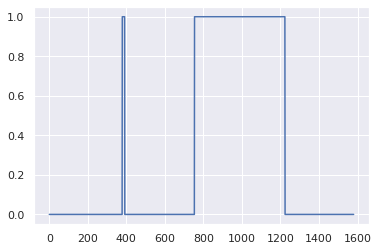

In [19]:
plot_df = result_df[result_df['pid']==9]
plot_df = plot_df.reset_index()
plt.plot(plot_df['target'])
plt.show()

In [20]:
result_df.head(5)

,time,pid,xmean_mean_4,ymean_mean_4,zmean_mean_4,xstd_mean_4,ystd_mean_4,zstd_mean_4,xmed_mean_4,ymed_mean_4,zmed_mean_4,xzcr_mean_4,yzcr_mean_4,zzcr_mean_4,xmean_var_4,ymean_var_4,zmean_var_4,xstd_var_4,ystd_var_4,zstd_var_4,xmed_var_4,ymed_var_4,zmed_var_4,xzcr_var_4,yzcr_var_4,zzcr_var_4,xmean_max_4,ymean_max_4,zmean_max_4,xstd_max_4,ystd_max_4,zstd_max_4,xmed_max_4,ymed_max_4,zmed_max_4,xzcr_max_4,yzcr_max_4,zzcr_max_4,xmean_min_4,ymean_min_4,zmean_min_4,xstd_min_4,ystd_min_4,zstd_min_4,xmed_min_4,ymed_min_4,zmed_min_4,xzcr_min_4,yzcr_min_4,zzcr_min_4,xmean_mean_lt_4,ymean_mean_lt_4,zmean_mean_lt_4,xstd_mean_lt_4,ystd_mean_lt_4,zstd_mean_lt_4,xmed_mean_lt_4,ymed_mean_lt_4,zmed_mean_lt_4,xzcr_mean_lt_4,yzcr_mean_lt_4,zzcr_mean_lt_4,xmean_mean_ut_4,ymean_mean_ut_4,zmean_mean_ut_4,xstd_mean_ut_4,ystd_mean_ut_4,zstd_mean_ut_4,xmed_mean_ut_4,ymed_mean_ut_4,zmed_mean_ut_4,xzcr_mean_ut_4,yzcr_mean_ut_4,zzcr_mean_ut_4,target
0,1.493740e+09,6.0,-0.131313,0.398510,0.404197,0.117225,0.409462,0.481892,-0.070511,0.162096,0.105061,5.4,13.6,1.0,0.092476,1.328307,0.923965,0.091193,1.293942,1.836139,0.014162,0.194715,0.005610,42.24,33.44,3.40,-0.008604,3.854938,3.284463,1.022874,3.821641,4.546255,-0.011934,1.481957,0.272059,18.0,20.0,6.0,-1.042719,-0.001158,0.022395,0.009706,0.017406,0.011274,-0.425623,-0.002827,0.023025,0.0,0.0,0.0,-0.378828,-0.000797,0.035202,0.010592,0.018209,0.014069,-0.173399,-0.001999,0.034616,0.000000,6.000000,0.000000,-0.012986,1.327480,1.202008,0.361926,1.312652,1.561163,-0.015700,0.540415,0.201792,14.666667,19.000000,3.333333,0.0
1,1.493740e+09,6.0,-0.003079,-0.001430,0.083747,0.011623,0.021888,0.013794,-0.005110,-0.001258,0.084594,23.8,16.1,6.9,0.000008,0.000007,0.007125,0.000004,0.000020,0.000036,0.000004,0.000015,0.007105,34.76,3.29,83.69,0.001198,0.001881,0.197864,0.014501,0.027954,0.028774,-0.001743,0.003515,0.197648,31.0,19.0,24.0,-0.006022,-0.006767,-0.003999,0.007318,0.014344,0.008122,-0.008538,-0.009182,-0.002851,12.0,13.0,0.0,-0.005870,-0.004837,-0.000929,0.009118,0.016734,0.009090,-0.007583,-0.006063,0.001540,16.000000,13.666667,0.000000,0.000603,0.001353,0.193419,0.014033,0.027260,0.021486,-0.002701,0.002704,0.193856,29.666667,18.000000,20.333333,0.0
2,1.493740e+09,6.0,0.002583,0.001353,0.058742,0.081255,0.092490,0.030157,-0.000809,0.000430,0.057353,28.6,15.6,6.4,0.000010,0.000032,0.003338,0.008447,0.004033,0.000240,0.000017,0.000018,0.003409,27.24,9.04,43.24,0.007402,0.016484,0.184658,0.328430,0.234250,0.058589,0.008598,0.008643,0.190452,36.0,23.0,20.0,-0.003962,-0.003859,0.001465,0.017208,0.029950,0.009401,-0.007024,-0.005420,0.002516,15.0,10.0,0.0,-0.000789,-0.003332,0.008814,0.020888,0.035510,0.014092,-0.005179,-0.003842,0.008299,23.000000,13.000000,0.000000,0.006075,0.007609,0.133111,0.196870,0.178749,0.050330,0.003898,0.006015,0.133017,32.666667,18.333333,14.666667,0.0
3,1.493740e+09,6.0,0.006096,-0.008640,0.011789,0.056444,0.075090,0.027880,0.000361,-0.010076,0.009235,21.6,14.5,16.9,0.000076,0.000380,0.000453,0.006515,0.011804,0.000476,0.000112,0.000673,0.000473,52.44,4.45,77.89,0.023730,0.003377,0.067380,0.264229,0.376413,0.078032,0.016899,0.004201,0.064772,34.0,18.0,26.0,-0.003497,-0.059482,-0.006578,0.004181,0.011146,0.008972,-0.021032,-0.083226,-0.009367,12.0,10.0,0.0,-0.001833,-0.031368,-0.003731,0.007050,0.013001,0.011238,-0.010368,-0.037662,-0.006234,13.000000,12.000000,4.333333,0.017947,0.002674,0.036790,0.151969,0.193942,0.058848,0.012886,0.003384,0.035254,30.666667,16.666667,24.333333,0.0
4,1.493740e+09,6.0,-0.244017,0.046759,0.017353,0.836908,0.533889,1.548439,-0.239680,0.000762,-0.070494,10.7,11.9,10.3,0.212299,0.051950,0.176607,0.442298,0.173073,1.645518,0.132249,0.026664,0.277521,19.01,17.89,16.81,0.409576,0.591300,0.647374,1.965242,1.452477,4.398435,0.059102,0.237074,0.562109,17.0,18.0,17.0,-1.290077,-0.286983,-0.974871,0.263077,0.127611,0.142581,-1.218529,-0.293200,-1.503839,1.0,4.0,4.0,-0.825469,-0.193685,-0.470277,0.291136,0.159590,0.367495,-0.665699,-0.186544,-0.625337,5.6666

In [21]:
len(result_df.columns)

75

In [22]:
df_cols = list(result_df.columns)
# print(len(df_cols))
for col in df_cols[2:74]:
  new_colname = 'diff_'+col
  result_df[new_colname] = result_df[col] - result_df[col].shift(-1)

result_df.head(20)

,time,pid,xmean_mean_4,ymean_mean_4,zmean_mean_4,xstd_mean_4,ystd_mean_4,zstd_mean_4,xmed_mean_4,ymed_mean_4,zmed_mean_4,xzcr_mean_4,yzcr_mean_4,zzcr_mean_4,xmean_var_4,ymean_var_4,zmean_var_4,xstd_var_4,ystd_var_4,zstd_var_4,xmed_var_4,ymed_var_4,zmed_var_4,xzcr_var_4,yzcr_var_4,zzcr_var_4,xmean_max_4,ymean_max_4,zmean_max_4,xstd_max_4,ystd_max_4,zstd_max_4,xmed_max_4,ymed_max_4,zmed_max_4,xzcr_max_4,yzcr_max_4,zzcr_max_4,xmean_min_4,ymean_min_4,zmean_min_4,xstd_min_4,ystd_min_4,zstd_min_4,xmed_min_4,ymed_min_4,zmed_min_4,xzcr_min_4,yzcr_min_4,zzcr_min_4,xmean_mean_lt_4,ymean_mean_lt_4,zmean_mean_lt_4,xstd_mean_lt_4,ystd_mean_lt_4,zstd_mean_lt_4,xmed_mean_lt_4,ymed_mean_lt_4,zmed_mean_lt_4,xzcr_mean_lt_4,yzcr_mean_lt_4,zzcr_mean_lt_4,xmean_mean_ut_4,ymean_mean_ut_4,zmean_mean_ut_4,xstd_mean_ut_4,ystd_mean_ut_4,zstd_mean_ut_4,xmed_mean_ut_4,ymed_mean_ut_4,zmed_mean_ut_4,xzcr_mean_ut_4,yzcr_mean_ut_4,zzcr_mean_ut_4,target,diff_xmean_mean_4,diff_ymean_mean_4,diff_zmean_mean_4,diff_xstd_mean_4,diff_ystd_mean_4,diff_zstd_mean_4,diff_xmed_mean_4,diff_ymed_mean_4,diff_zmed_mean_4,diff_xzcr_mean_4,diff_yzcr_mean_4,diff_zzcr_mean_4,diff_xmean_var_4,diff_ymean_var_4,diff_zmean_var_4,diff_xstd_var_4,diff_ystd_var_4,diff_zstd_var_4,diff_xmed_var_4,diff_ymed_var_4,diff_zmed_var_4,diff_xzcr_var_4,diff_yzcr_var_4,diff_zzcr_var_4,diff_xmean_max_4,diff_ymean_max_4,diff_zmean_max_4,diff_xstd_max_4,diff_ystd_max_4,diff_zstd_max_4,diff_xmed_max_4,diff_ymed_max_4,diff_zmed_max_4,diff_xzcr_max_4,diff_yzcr_max_4,diff_zzcr_max_4,diff_xmean_min_4,diff_ymean_min_4,diff_zmean_min_4,diff_xstd_min_4,diff_ystd_min_4,diff_zstd_min_4,diff_xmed_min_4,diff_ymed_min_4,diff_zmed_min_4,diff_xzcr_min_4,diff_yzcr_min_4,diff_zzcr_min_4,diff_xmean_mean_lt_4,diff_ymean_mean_lt_4,diff_zmean_mean_lt_4,diff_xstd_mean_lt_4,diff_ystd_mean_lt_4,diff_zstd_mean_lt_4,diff_xmed_mean_lt_4,diff_ymed_mean_lt_4,diff_zmed_mean_lt_4,diff_xzcr_mean_lt_4,diff_yzcr_mean_lt_4,diff_zzcr_mean_lt_4,diff_xmean_mean_ut_4,diff_ymean_mean_ut_4,diff_zmean_mean_ut_4,diff_xstd_mean_ut_4,diff_ystd_mean_ut_4,diff_zstd_mean_ut_4,diff_xmed_mean_ut_4,diff_ymed_mean_ut_4,diff_zmed_mean_ut_4,diff_xzcr_mean_ut_4,diff_yzcr_mean_ut_4,diff_zzcr_mean_ut_4
0,1.493740e+09,6.0,-0.131313,0.398510,0.404197,0.117225,0.409462,0.481892,-0.070511,0.162096,0.105061,5.4,13.6,1.0,0.092476,1.328307,0.923965,0.091193,1.293942,1.836139,0.014162,0.194715,0.005610,42.24,33.44,3.40,-0.008604,3.854938,3.284463,1.022874,3.821641,4.546255,-0.011934,1.481957,0.272059,18.0,20.0,6.0,-1.042719,-0.001158,0.022395,0.009706,0.017406,0.011274,-0.425623,-0.002827,0.023025,0.0,0.0,0.0,-0.378828,-0.000797,0.035202,0.010592,0.018209,0.014069,-0.173399,-0.001999,0.034616,0.000000,6.000000,0.000000,-0.012986,1.327480,1.202008,0.361926,1.312652,1.561163,-0.015700,0.540415,0.201792,14.666667,19.000000,3.333333,0.0,-0.128233,0.399941,0.320450,0.105602,0.387574,0.468098,-0.065400,0.163355,0.020468,-18.4,-2.5,-5.9,0.092469,1.328299,0.916840,0.091188,1.293922,1.836103,0.014157,0.194700,-0.001495,7.48,30.15,-80.29,-0.009802,3.853057,3.086600,1.008372,3.793687,4.517481,-0.010191,1.478442,0.074411,-13.0,1.0,-18.0,-1.036697,0.005609,0.026395,0.002389,0.003062,0.003152,-0.417085,0.006355,0.025876,-12.0,-13.0,0.0,-0.372957,0.004041,0.036131,0.001474,0.001475,0.004979,-0.165815,0.004064,0.033076,-16.000000,-7.666667,0.000000,-0.013589,1.326127,1.008589,0.347893,1.285392,1.539678,-0.012999,0.537711,0.007936,-15.000000,1.000000,-17.000000
1,1.493740e+09,6.0,-0.003079,-0.001430,0.083747,0.011623,0.021888,0.013794,-0.005110,-0.001258,0.084594,23.8,16.1,6.9,0.000008,0.000007,0.007125,0.000004,0.000020,0.000036,0.000004,0.000015,0.007105,34.76,3.29,83.69,0.001198,0.001881,0.197864,0.014501,0.027954,0.028774,-0.001743,0.003515,0.197648,31.0,19.0,24.0,-0.006022,-0.006767,-0.003999,0.007318,0.014344,0.008122,-0.008538,-0.009182,-0.002851,12.0,13.0,0.0,-0.005870,-0.004837,-0.000929,0.009118,0.016734,0.009090,-0.007583,-0.006063,0.001540,16.000000,13.666667,0.000000

In [23]:
copy_target = list(result_df['target'])
result_df.drop(columns=['target'], inplace=True)
result_df['target'] = copy_target
result_df.head(5)

,time,pid,xmean_mean_4,ymean_mean_4,zmean_mean_4,xstd_mean_4,ystd_mean_4,zstd_mean_4,xmed_mean_4,ymed_mean_4,zmed_mean_4,xzcr_mean_4,yzcr_mean_4,zzcr_mean_4,xmean_var_4,ymean_var_4,zmean_var_4,xstd_var_4,ystd_var_4,zstd_var_4,xmed_var_4,ymed_var_4,zmed_var_4,xzcr_var_4,yzcr_var_4,zzcr_var_4,xmean_max_4,ymean_max_4,zmean_max_4,xstd_max_4,ystd_max_4,zstd_max_4,xmed_max_4,ymed_max_4,zmed_max_4,xzcr_max_4,yzcr_max_4,zzcr_max_4,xmean_min_4,ymean_min_4,zmean_min_4,xstd_min_4,ystd_min_4,zstd_min_4,xmed_min_4,ymed_min_4,zmed_min_4,xzcr_min_4,yzcr_min_4,zzcr_min_4,xmean_mean_lt_4,ymean_mean_lt_4,zmean_mean_lt_4,xstd_mean_lt_4,ystd_mean_lt_4,zstd_mean_lt_4,xmed_mean_lt_4,ymed_mean_lt_4,zmed_mean_lt_4,xzcr_mean_lt_4,yzcr_mean_lt_4,zzcr_mean_lt_4,xmean_mean_ut_4,ymean_mean_ut_4,zmean_mean_ut_4,xstd_mean_ut_4,ystd_mean_ut_4,zstd_mean_ut_4,xmed_mean_ut_4,ymed_mean_ut_4,zmed_mean_ut_4,xzcr_mean_ut_4,yzcr_mean_ut_4,zzcr_mean_ut_4,diff_xmean_mean_4,diff_ymean_mean_4,diff_zmean_mean_4,diff_xstd_mean_4,diff_ystd_mean_4,diff_zstd_mean_4,diff_xmed_mean_4,diff_ymed_mean_4,diff_zmed_mean_4,diff_xzcr_mean_4,diff_yzcr_mean_4,diff_zzcr_mean_4,diff_xmean_var_4,diff_ymean_var_4,diff_zmean_var_4,diff_xstd_var_4,diff_ystd_var_4,diff_zstd_var_4,diff_xmed_var_4,diff_ymed_var_4,diff_zmed_var_4,diff_xzcr_var_4,diff_yzcr_var_4,diff_zzcr_var_4,diff_xmean_max_4,diff_ymean_max_4,diff_zmean_max_4,diff_xstd_max_4,diff_ystd_max_4,diff_zstd_max_4,diff_xmed_max_4,diff_ymed_max_4,diff_zmed_max_4,diff_xzcr_max_4,diff_yzcr_max_4,diff_zzcr_max_4,diff_xmean_min_4,diff_ymean_min_4,diff_zmean_min_4,diff_xstd_min_4,diff_ystd_min_4,diff_zstd_min_4,diff_xmed_min_4,diff_ymed_min_4,diff_zmed_min_4,diff_xzcr_min_4,diff_yzcr_min_4,diff_zzcr_min_4,diff_xmean_mean_lt_4,diff_ymean_mean_lt_4,diff_zmean_mean_lt_4,diff_xstd_mean_lt_4,diff_ystd_mean_lt_4,diff_zstd_mean_lt_4,diff_xmed_mean_lt_4,diff_ymed_mean_lt_4,diff_zmed_mean_lt_4,diff_xzcr_mean_lt_4,diff_yzcr_mean_lt_4,diff_zzcr_mean_lt_4,diff_xmean_mean_ut_4,diff_ymean_mean_ut_4,diff_zmean_mean_ut_4,diff_xstd_mean_ut_4,diff_ystd_mean_ut_4,diff_zstd_mean_ut_4,diff_xmed_mean_ut_4,diff_ymed_mean_ut_4,diff_zmed_mean_ut_4,diff_xzcr_mean_ut_4,diff_yzcr_mean_ut_4,diff_zzcr_mean_ut_4,target
0,1.493740e+09,6.0,-0.131313,0.398510,0.404197,0.117225,0.409462,0.481892,-0.070511,0.162096,0.105061,5.4,13.6,1.0,0.092476,1.328307,0.923965,0.091193,1.293942,1.836139,0.014162,0.194715,0.005610,42.24,33.44,3.40,-0.008604,3.854938,3.284463,1.022874,3.821641,4.546255,-0.011934,1.481957,0.272059,18.0,20.0,6.0,-1.042719,-0.001158,0.022395,0.009706,0.017406,0.011274,-0.425623,-0.002827,0.023025,0.0,0.0,0.0,-0.378828,-0.000797,0.035202,0.010592,0.018209,0.014069,-0.173399,-0.001999,0.034616,0.000000,6.000000,0.000000,-0.012986,1.327480,1.202008,0.361926,1.312652,1.561163,-0.015700,0.540415,0.201792,14.666667,19.000000,3.333333,-0.128233,0.399941,0.320450,0.105602,0.387574,0.468098,-0.065400,0.163355,0.020468,-18.4,-2.5,-5.9,0.092469,1.328299,0.916840,0.091188,1.293922,1.836103,0.014157,0.194700,-0.001495,7.48,30.15,-80.29,-0.009802,3.853057,3.086600,1.008372,3.793687,4.517481,-0.010191,1.478442,0.074411,-13.0,1.0,-18.0,-1.036697,0.005609,0.026395,0.002389,0.003062,0.003152,-0.417085,0.006355,0.025876,-12.0,-13.0,0.0,-0.372957,0.004041,0.036131,0.001474,0.001475,0.004979,-0.165815,0.004064,0.033076,-16.000000,-7.666667,0.000000,-0.013589,1.326127,1.008589,0.347893,1.285392,1.539678,-0.012999,0.537711,0.007936,-15.000000,1.000000,-17.000000,0.0
1,1.493740e+09,6.0,-0.003079,-0.001430,0.083747,0.011623,0.021888,0.013794,-0.005110,-0.001258,0.084594,23.8,16.1,6.9,0.000008,0.000007,0.007125,0.000004,0.000020,0.000036,0.000004,0.000015,0.007105,34.76,3.29,83.69,0.001198,0.001881,0.197864,0.014501,0.027954,0.028774,-0.001743,0.003515,0.197648,31.0,19.0,24.0,-0.006022,-0.006767,-0.003999,0.007318,0.014344,0.008122,-0.008538,-0.009182,-0.002851,12.0,13.0,0.0,-0.005870,-0.004837,-0.000929,0.009118,0.016734,0.009090,-0.007583,-0.006063,0.001540,16.000000,13.666667,0.000000

In [24]:
# we have 36970 rows and 147 features

print("rows", len(result_df))
print("cols", len(result_df.columns))

rows 36970
cols 147


In [25]:
result_df = result_df.dropna()
len(result_df)

36969

In [26]:
# 3rd Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = result_df[result_df.columns[:-1]]
y = result_df[result_df.columns[-1]]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=109) 

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=400, max_depth = 18, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,y_train)

y_pred=clf1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9149761067532234


In [27]:
from sklearn.metrics import roc_auc_score, confusion_matrix

print("ROC_AUC_Score:",roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ROC_AUC_Score: 0.8720523651755329
[[8124  413]
 [ 530 2024]]


In [28]:
!pip3 install scikit-plot

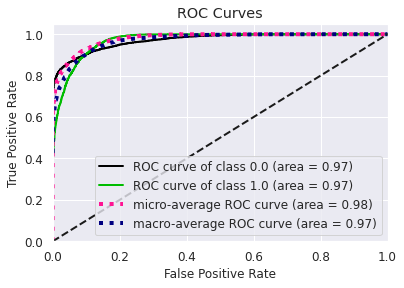

In [29]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_pred1 = clf1.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred1)
plt.show()

In [30]:
from sklearn.metrics import average_precision_score, precision_score
# average_precision = average_precision_score(y_test, y_pred)
precision_score(y_test, y_pred, average='macro')

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

0.8846429918389924

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.9149761067532234

In [0]:
name = "/content/drive/Shared drives/ML Project/data/final_train_data_10sec.csv"
result_df.to_csv(name, index=False)

# Important Features model

In [0]:
# clf.feature_importances_
columns = result_df.columns
sorted_list = sorted(zip(map(lambda x: round(x, 4), clf1.feature_importances_), columns), 
             reverse=True)

#Now taking only 0.2 important features
length = 0.4 * len(sorted_list)
columns = []
for col in sorted_list:
  columns.append(col[1])
imp_features = columns[:int(length)]
len(imp_features)

58

In [0]:
# 4th Random Forest
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = train_data[train_data.columns[:-1]]
y = train_data[train_data.columns[-1]]

X = X[imp_features]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=109) 

#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=400, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)



# print("ROC_AUC_Score:",roc_auc_score(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

In [0]:
y_pred=clf1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [0]:
from sklearn.metrics import average_precision_score, precision_score
# average_precision = average_precision_score(y_test, y_pred)
precision_score(y_test, y_pred, average='macro')

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

0.999484250931232

In [0]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.9996843434343434